In [40]:
##Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import numpy as np
import statsmodels.stats.api as sms

In [2]:
#Imporing the bike dataset
bike_data=pd.read_csv("bike data.csv",parse_dates=True,squeeze=True)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.shape

(730, 16)

In [4]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data["season"]=bike_data["season"].replace([1,2,3,4],["spring","summer","fall","winter"])
bike_data["weathersit"]=bike_data["weathersit"].replace([1,2,3,4],["Clear","Mist","Snow/Rain","Storm"])

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


In [8]:
#Checking for null values in all columns
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Since instant column is just an index column we will drop that
bike_data=bike_data.drop("instant",axis=1)

In [11]:
#Converting date column from object to datetime
#bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

In [12]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#Dividing the dataset into two equal havles depending upon the year
bike_data1,bike_data2=np.array_split(bike_data,2)

In [14]:
bike_data1

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27-12-2018,spring,0,12,0,2,1,Mist,13.325000,16.38165,76.2500,12.626150,103,1059,1162
361,28-12-2018,spring,0,12,0,3,1,Clear,12.264330,13.99870,50.3913,19.695387,255,2047,2302
362,29-12-2018,spring,0,12,0,4,1,Clear,10.181653,13.19460,57.4167,8.000604,254,2169,2423
363,30-12-2018,spring,0,12,0,5,1,Clear,12.778347,15.94060,63.6667,9.000579,491,2508,2999


In [15]:
bike_data2

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,01-01-2019,spring,1,1,0,0,0,Clear,15.170000,18.78105,69.2500,12.875189,686,1608,2294
366,02-01-2019,spring,1,1,1,1,0,Clear,11.194763,12.61520,38.1304,22.087555,244,1707,1951
367,03-01-2019,spring,1,1,0,2,1,Clear,6.150000,6.31375,44.1250,24.499957,89,2147,2236
368,04-01-2019,spring,1,1,0,3,1,Mist,4.407500,5.96685,41.4583,12.374900,95,2273,2368
369,05-01-2019,spring,1,1,0,4,1,Clear,10.899153,13.92060,52.4167,8.709129,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,spring,1,12,0,4,1,Mist,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,spring,1,12,0,5,1,Mist,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,spring,1,12,0,6,0,Mist,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,spring,1,12,0,0,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [16]:
x1=bike_data1["cnt"]
x2=bike_data2["cnt"]

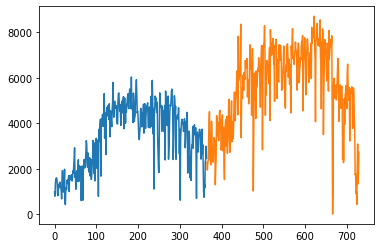

In [17]:
plt.plot(x1)
plt.plot(x2)

In [18]:
bike_data_grouped = bike_data.groupby(["season","yr"]).agg(mean_total_cnt=("cnt", 'mean'))
bike_data_grouped.reset_index(inplace=True)

In [19]:
bike_data_grouped

,season,yr,mean_total_cnt
0,fall,0,4464.361702
1,fall,1,6824.244681
2,spring,0,1666.666667
3,spring,1,3550.155556
4,summer,0,3775.173913
5,summer,1,6209.489130
6,winter,0,3664.460674
7,winter,1,5791.865169


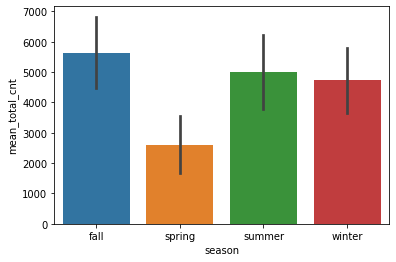

In [20]:
sns.barplot(x=bike_data_grouped["season"],y=bike_data_grouped["mean_total_cnt"])

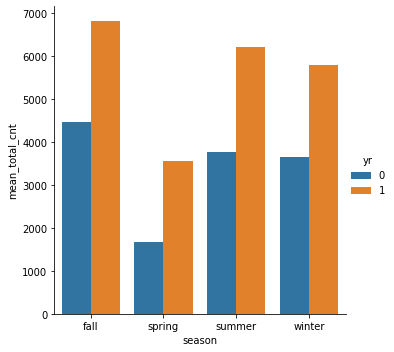

In [21]:
sns.catplot(data=bike_data_grouped, kind="bar",x="season", y="mean_total_cnt", hue="yr")

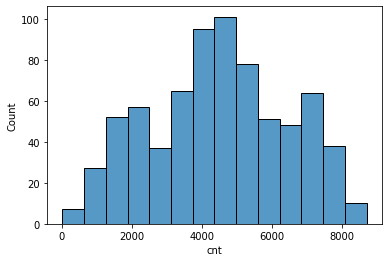

In [22]:
sns.histplot(bike_data["cnt"])

In [23]:
bike_corr=bike_data.corr()
bike_corr

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,2.505017e-01,1.212079e-01,0.054055,0.059978,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123


In [24]:
del bike_data["casual"]


In [25]:
bike_corr=bike_data.corr()
bike_corr

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,registered,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.596911,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.291952,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.109142,-0.068764
weekday,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,-0.000168,-0.007539,-0.052290,0.014283,0.057427,0.067534
workingday,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.053470,0.052940,0.023202,-0.018666,0.305437,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,1.000000,0.991696,0.128565,-0.158186,0.539436,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543678,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.089212,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.217914,-0.235132
registered,5.969106e-01,2.919516e-01,-0.109142,0.057427,0.305437,0.539436,0.543678,-0.089212,-0.217914,1.000000,0.945411


In [26]:
del bike_data["registered"]

In [27]:
bike_corr=bike_data.corr()
bike_corr

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.067534,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [28]:
del bike_data["atemp"]

In [29]:
bike_corr=bike_data.corr()
bike_corr

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,0.048789,-0.112547,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.219083,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
weekday,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,-0.000168,-0.052290,0.014283,0.067534
workingday,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.067534,0.062542,0.627044,-0.098543,-0.235132,1.000000


In [30]:
del bike_data["hum"]

In [31]:
bike_corr=bike_data.corr()
bike_corr

,yr,mnth,holiday,weekday,workingday,temp,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,0.048789,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.219083,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.028764,0.006257,-0.068764
weekday,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,-0.000168,0.014283,0.067534
workingday,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.053470,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,1.000000,-0.158186,0.627044
windspeed,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,-0.158186,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.067534,0.062542,0.627044,-0.235132,1.000000


In [32]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,12.522300,1600


In [33]:
from statsmodels.graphics.tsaplots import plot_acf
bike_data_time = bike_data[['dteday', 'cnt']].set_index(['dteday'])

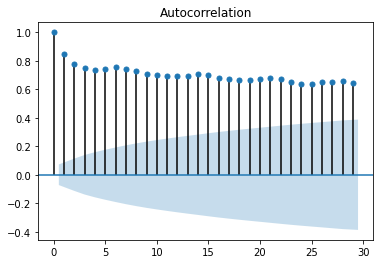

In [34]:
plot_acf(bike_data_time)
plt.show()

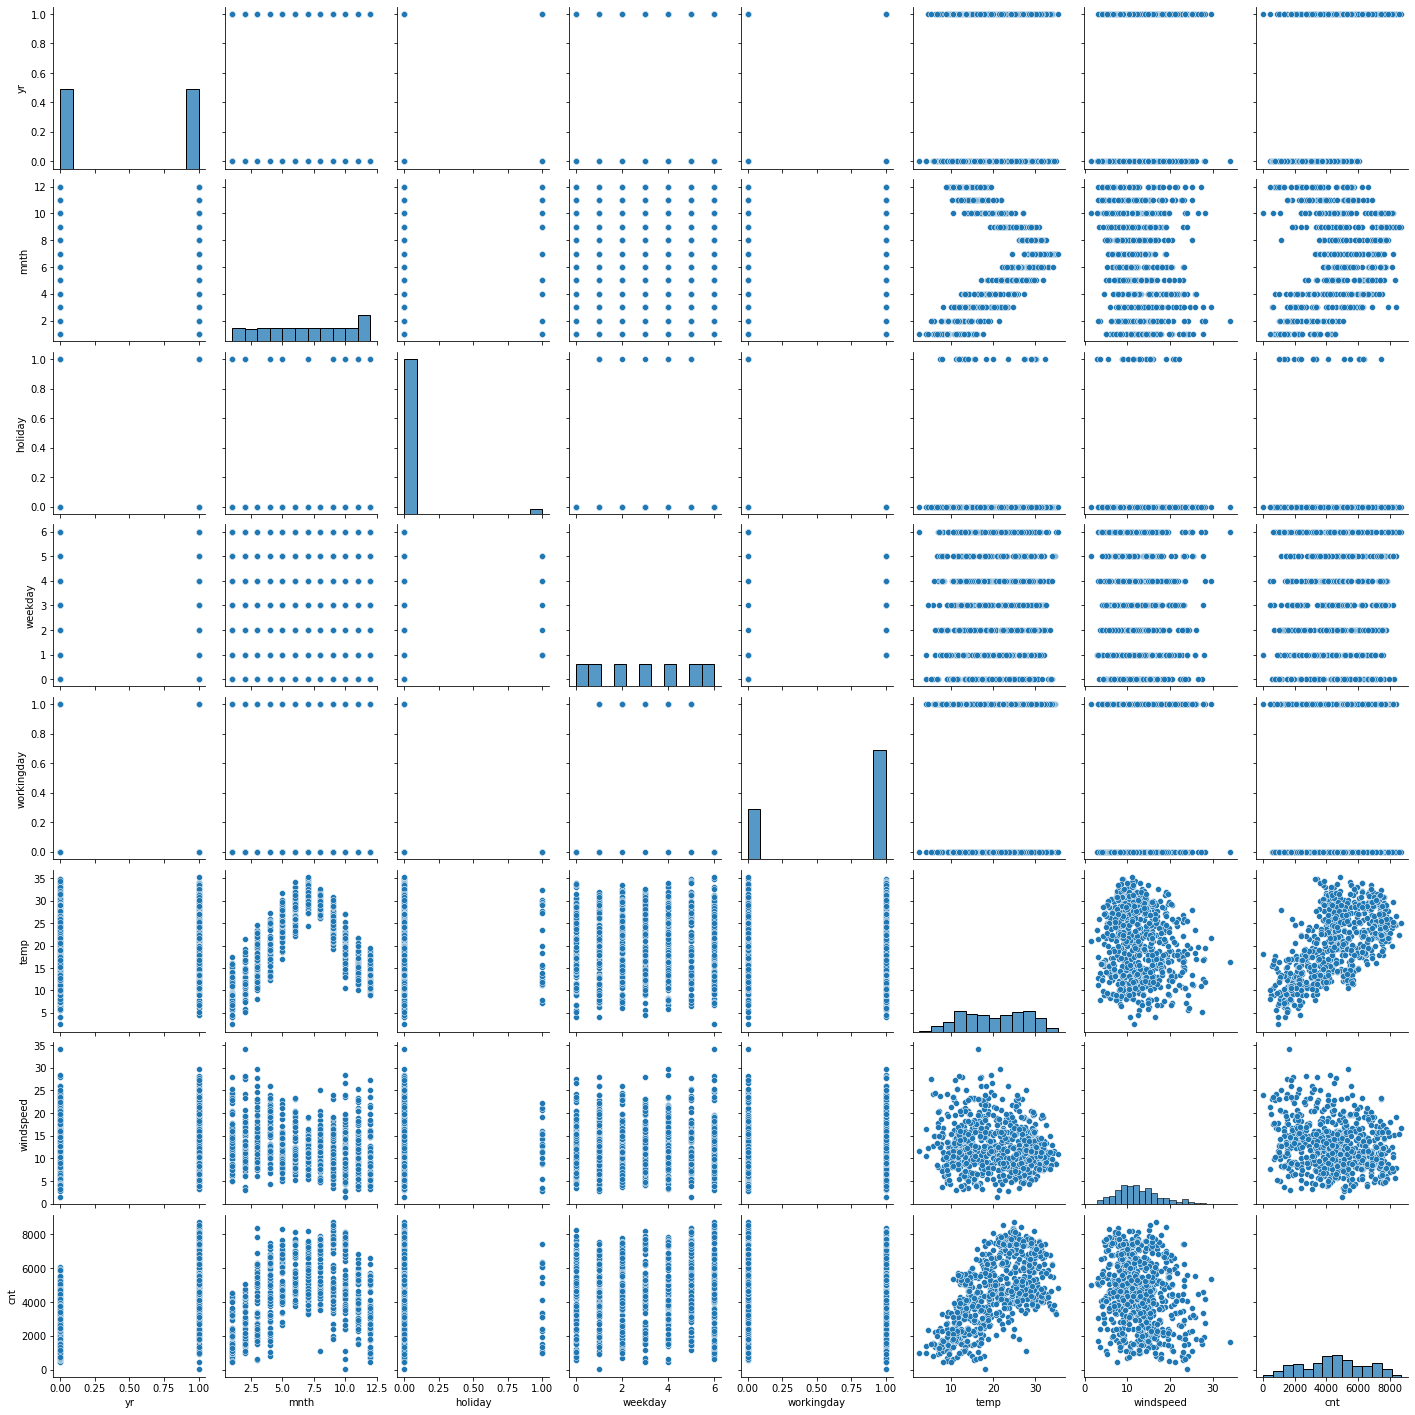

In [35]:
sns.pairplot(bike_data)

In [36]:
encoded_bike_data = pd.get_dummies(bike_data, columns = ['season', 'weathersit'],drop_first=True)

In [37]:
del encoded_bike_data["dteday"]

In [38]:
x=encoded_bike_data.drop(["cnt"],axis=1)
y=encoded_bike_data['cnt']

In [41]:
sc = MinMaxScaler()
x[["Scaledtemp", "Scaledwindspeed","Scaledweekday"]] = sc.fit_transform(x[["temp", "windspeed","weekday"]])
x.drop(["weekday","windspeed","temp"],axis=1,inplace=True)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 2)

In [83]:
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x)
print("R squared: {}".format(r2_score(y,y_pred)))

R squared: 0.8225154212399284


In [84]:
y_pred1=regr.predict(x_test)
print("R squared: {}".format(r2_score(y_test,y_pred1)))

R squared: 0.8207265209782335


In [85]:
residuals=y-y_pred
mean_residuals=np.mean(residuals)
print("Mean of residuals: {}".format(mean_residuals))

Mean of residuals: 20.150935862921912


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


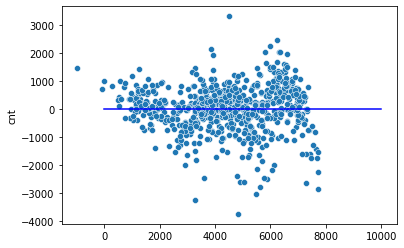

In [86]:
p=sns.scatterplot(y_pred,residuals)
plt.xlabel=('predicted values')
plt.ylabel=('Residuals')
plt.ylim=(-10,10)
plt.xlim=(0,26)
p=sns.lineplot([0,10000],[0,0],color='blue')

In [87]:
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x)
lzip(name, test)

[('F statistic', 2.259257144877251), ('p-value', 2.126486581269136e-14)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


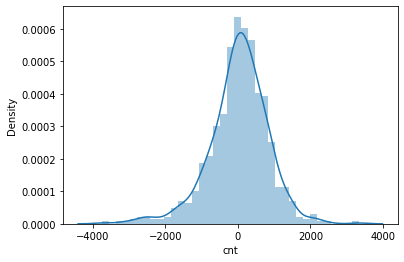

In [88]:
p=sns.distplot(residuals,kde=True)

In [89]:
mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
rmse

815.0619363848447